In [24]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import scipy as sp
import os



In [25]:
df=pd.read_csv("file:///F:/Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
df.shape

(150, 6)

In [28]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [29]:
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [30]:
df.describe().T

count       mean        std  min    25%    50%     75%    max
Id             150.0  75.500000  43.445368  1.0  38.25  75.50  112.75  150.0
SepalLengthCm  150.0   5.843333   0.828066  4.3   5.10   5.80    6.40    7.9
SepalWidthCm   150.0   3.054000   0.433594  2.0   2.80   3.00    3.30    4.4
PetalLengthCm  150.0   3.758667   1.764420  1.0   1.60   4.35    5.10    6.9
PetalWidthCm   150.0   1.198667   0.763161  0.1   0.30   1.30    1.80    2.5

In [31]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [32]:
df.value_counts

<bound method DataFrame.value_counts of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       I

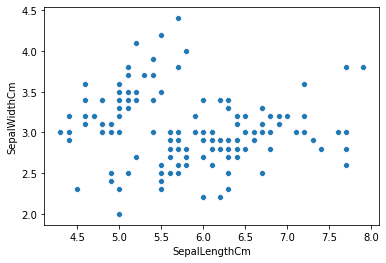

In [33]:
sns.scatterplot( x="SepalLengthCm", y= "SepalWidthCm",data=df)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


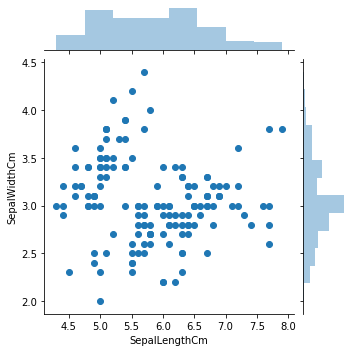

In [34]:
sns.jointplot( x="SepalLengthCm", y="SepalWidthCm",data=df, size=5)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


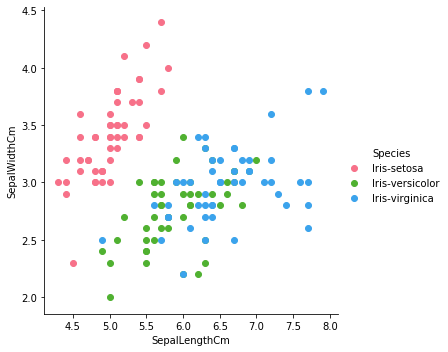

In [36]:
sns.FacetGrid(df, hue="Species", palette="husl",size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

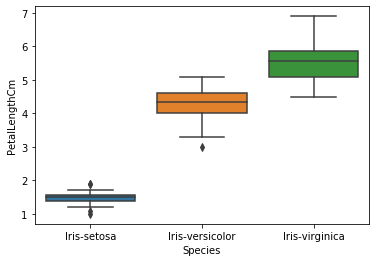

In [37]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

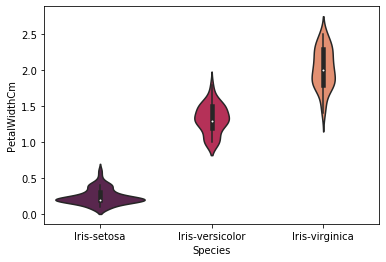

In [38]:
sns.violinplot(data=df, x="Species", y="PetalWidthCm",
                palette="rocket")

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


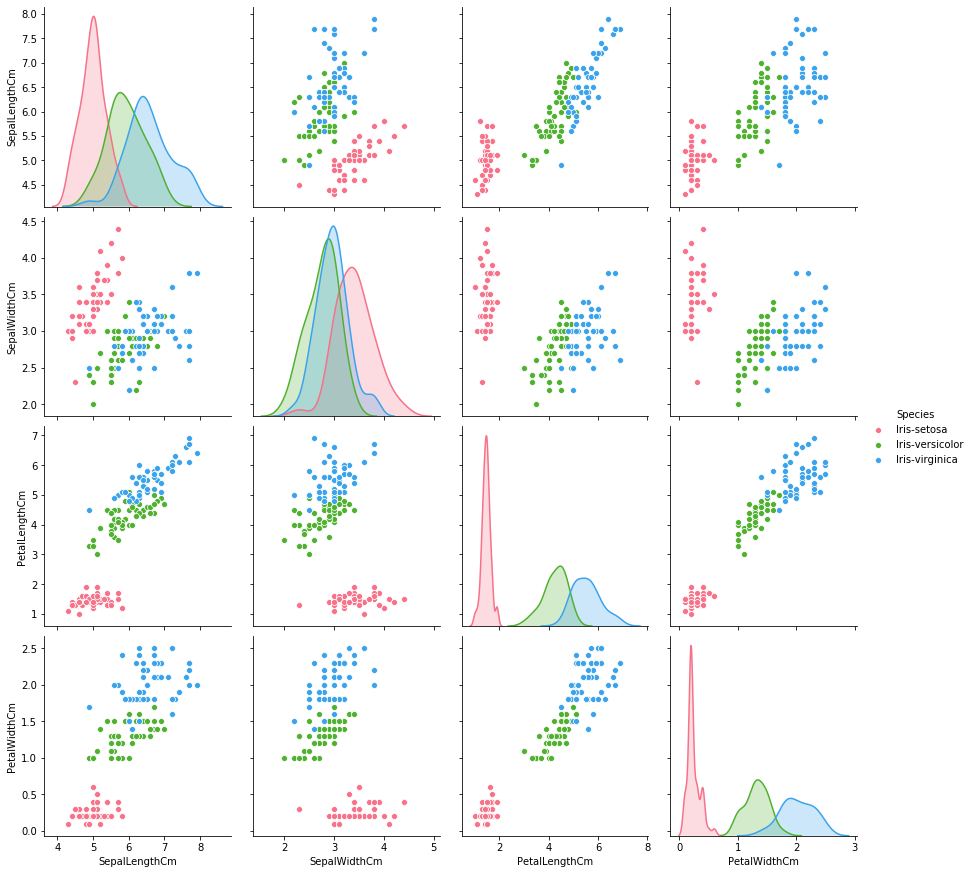

In [40]:
sns.pairplot(df.drop("Id", axis=1), 
             hue ="Species",palette= "husl", size=3) 

In [41]:
df.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

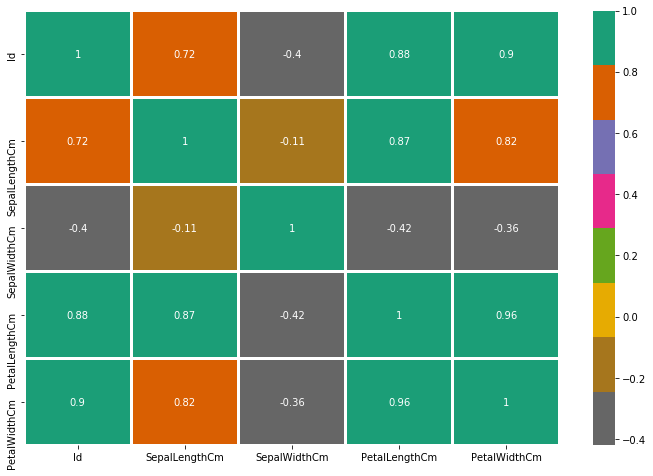

In [43]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

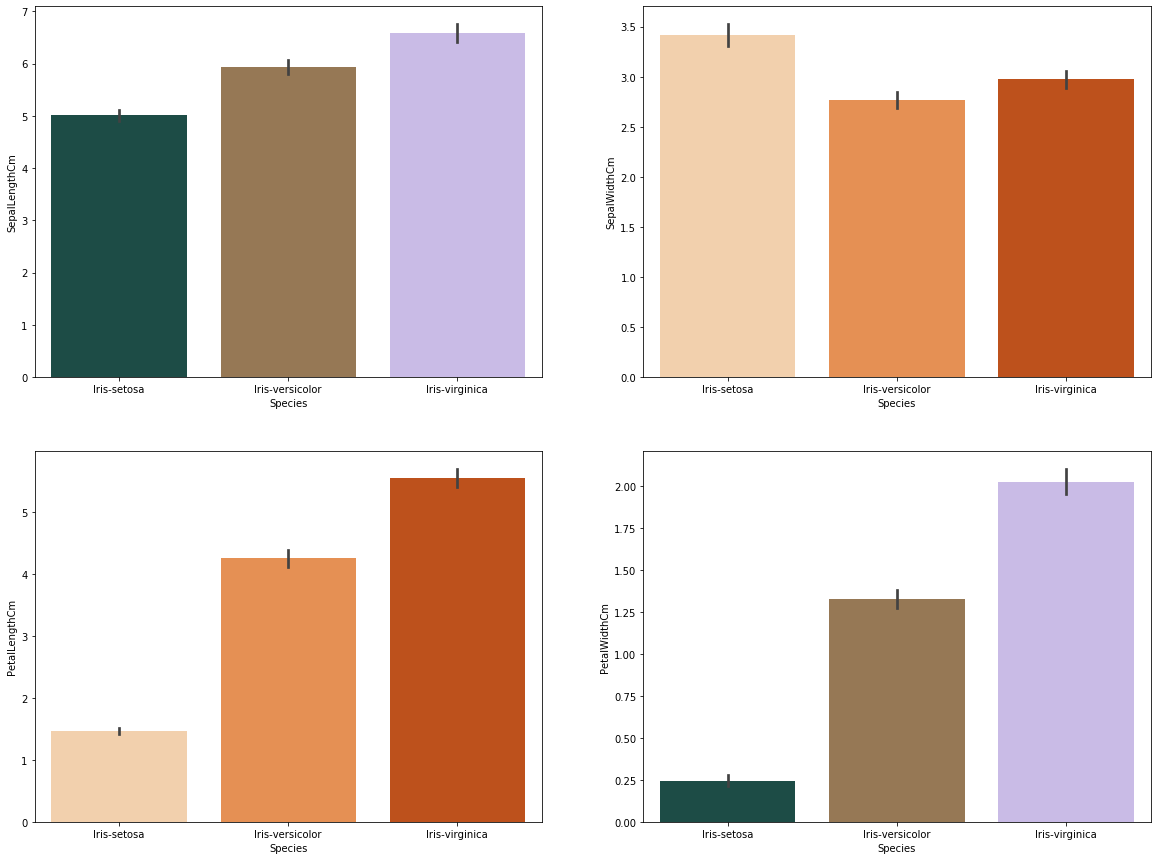

In [49]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = df, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = df, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = df, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = df, palette="cubehelix")

Text(0.5, 1.0, 'PetalWidth Interval')

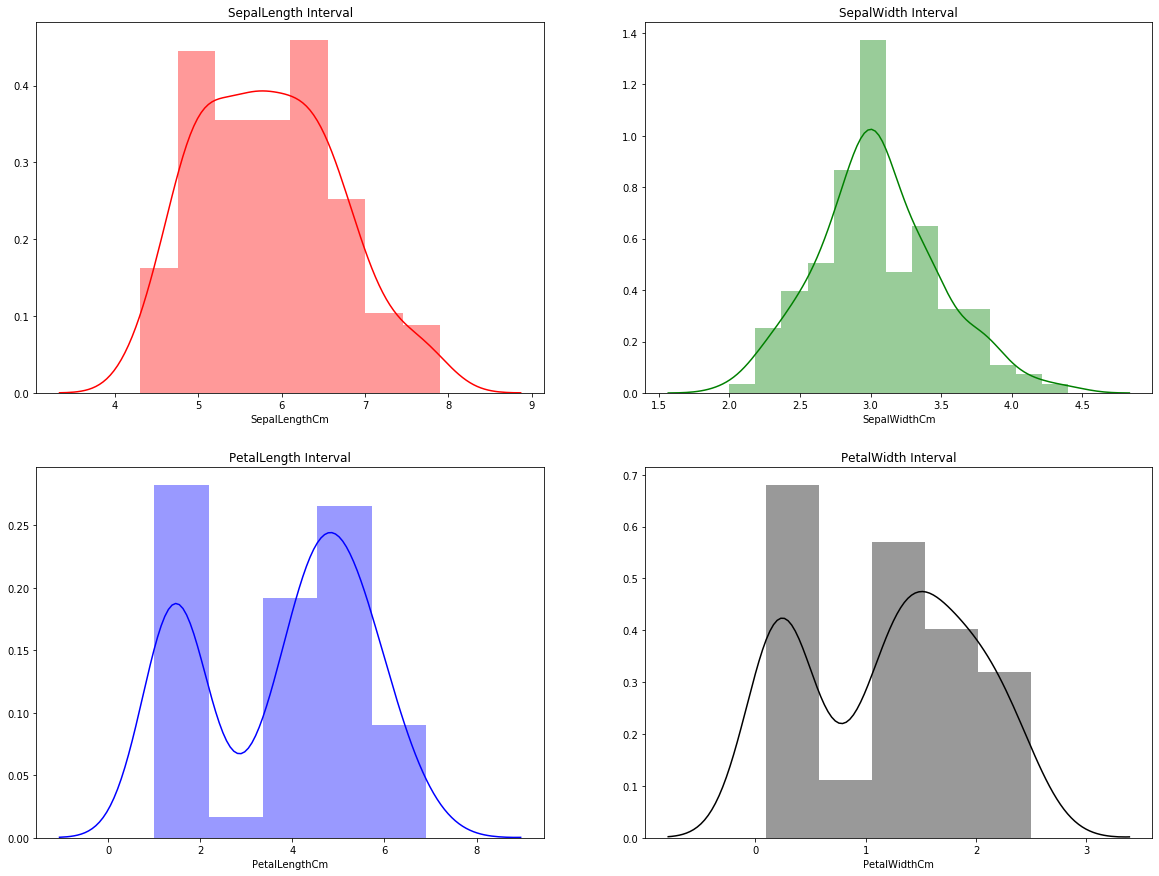

In [50]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'], color="red").set_title('SepalLength Interval')
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'], color="green").set_title('SepalWidth Interval')
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'], color="blue").set_title('PetalLength Interval')
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'], color="black").set_title('PetalWidth Interval')

In [51]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

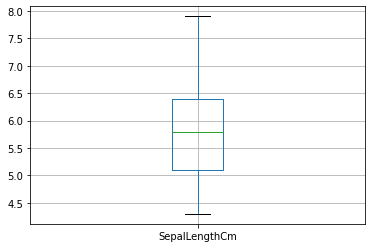

In [52]:
df.boxplot(column='SepalLengthCm')

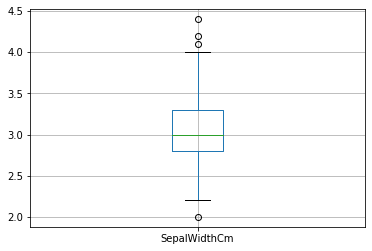

In [53]:
df.boxplot(column='SepalWidthCm')

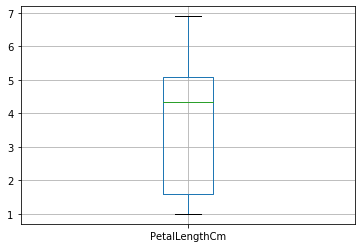

In [54]:
df.boxplot(column='PetalLengthCm')

In [55]:
import sweetviz as sv

In [56]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [57]:
from IPython.display import IFrame

In [58]:
IFrame(src='Analyze.html',width=1000,height=600)

In [59]:
from dataprep.eda import *

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\dask\dataframe\accessor.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)


  0%|          | 0/778 [00:00<?, ?it/s]

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\dask\dataframe\accessor.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


DataPrep Report
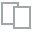
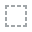
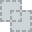
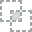
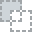
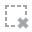
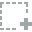
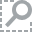
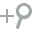
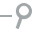
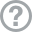
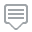
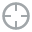
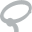
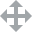
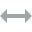
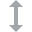
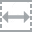
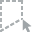
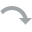
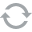
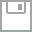
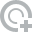
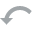
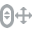
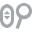
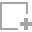
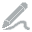
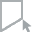
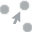
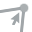
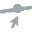

In [60]:
create_report(df)

In [61]:
import optuna

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()

In [70]:
df['Species']=le.fit_transform(df['Species'])

In [71]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [72]:
man=MinMaxScaler()
feat=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']
df[feat]=man.fit_transform(df[feat])
df[feat]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0         0.222222      0.625000       0.067797      0.041667      0.0
1         0.166667      0.416667       0.067797      0.041667      0.0
2         0.111111      0.500000       0.050847      0.041667      0.0
3         0.083333      0.458333       0.084746      0.041667      0.0
4         0.194444      0.666667       0.067797      0.041667      0.0
..             ...           ...            ...           ...      ...
145       0.666667      0.416667       0.711864      0.916667      1.0
146       0.555556      0.208333       0.677966      0.750000      1.0
147       0.611111      0.416667       0.711864      0.791667      1.0
148       0.527778      0.583333       0.745763      0.916667      1.0
149       0.444444      0.416667       0.694915      0.708333      1.0

[150 rows x 5 columns]

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
std=StandardScaler()
feat=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']
df[feat]=std.fit_transform(df[feat])
df[feat]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   Species
0        -0.900681      1.032057      -1.341272     -1.312977 -1.224745
1        -1.143017     -0.124958      -1.341272     -1.312977 -1.224745
2        -1.385353      0.337848      -1.398138     -1.312977 -1.224745
3        -1.506521      0.106445      -1.284407     -1.312977 -1.224745
4        -1.021849      1.263460      -1.341272     -1.312977 -1.224745
..             ...           ...            ...           ...       ...
145       1.038005     -0.124958       0.819624      1.447956  1.224745
146       0.553333     -1.281972       0.705893      0.922064  1.224745
147       0.795669     -0.124958       0.819624      1.053537  1.224745
148       0.432165      0.800654       0.933356      1.447956  1.224745
149       0.068662     -0.124958       0.762759      0.790591  1.224745

[150 rows x 5 columns]